In [1]:
import numpy as np
import pandas as pd
df=pd.read_csv('/Users/chengfangbei/Downloads/lending-club-loan-data/loan.csv',low_memory=False)

In [2]:
df1=df.dropna(thresh=len(df)*0.6,axis=1)
df2=df1.drop(['funded_amnt','emp_title','funded_amnt_inv','sub_grade','addr_state','verification_status','last_credit_pull_d','issue_d','pymnt_plan','title','zip_code','earliest_cr_line','revol_util','out_prncp_inv','total_pymnt_inv','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','collections_12_mths_ex_med','policy_code','hardship_flag','debt_settlement_flag','inq_last_12m'],axis=1)

In [4]:
def simi(df):
    maxnum = (df.value_counts().max())/2260668
    return maxnum
                    
data_similar = pd.DataFrame(df2.apply(simi),columns={"simi"}) 
data_similar = data_similar.sort_values("simi",ascending=False)
data_similar

,simi
delinq_amnt,0.996814
acc_now_delinq,0.996102
chargeoff_within_12_mths,0.992335
tax_liens,0.971365
num_tl_30dpd,0.966334
disbursement_method,0.965443
application_type,0.946604
num_tl_120dpd_2m,0.931467
num_tl_90g_dpd_24m,0.917012
pub_rec_bankruptcies,0.879113


In [3]:
df3=df2.drop(['delinq_amnt','acc_now_delinq','chargeoff_within_12_mths','tax_liens','num_tl_30dpd','disbursement_method','application_type','num_tl_120dpd_2m','num_tl_90g_dpd_24m'],axis=1)

In [4]:
objectcols = df3.select_dtypes(include=["object"]).columns
df3[objectcols] = df2[objectcols].fillna("Unknown")

In [5]:
df3.dropna(inplace=True)

In [6]:
bad_loan = ["Charged Off", "Default", "Does not meet the credit policy. Status:Charged Off", "In Grace Period", 
            "Late (16-30 days)", "Late (31-120 days)"]
df3['loan_condition'] = np.nan
def loan_condition(status):
    if status in bad_loan:
        return 1
    else:
        return 0
df3['loan_condition'] = df3['loan_status'].apply(loan_condition)
df3 = df3.drop(['loan_status'], axis=1)

In [7]:
mapping_dict={"emp_length": {"10+ years": 10,"9 years": 9,"8 years": 8,"7 years": 7,"6 years": 6,"5 years": 5,"4 years": 4,"3 years": 3,"2 years": 2,"1 year": 1,"< 1 year": 0,"Unknown":0},
                      "grade":{"A": 1,"B": 2,"C": 3,"D": 4,"E": 5,"F": 6,"G": 7}}
df3 = df3.replace(mapping_dict)

In [8]:
dummies_cols=['term','home_ownership','purpose','initial_list_status']
df3_dummies=pd.get_dummies(df3[dummies_cols])
df3 = pd.concat([df3, df3_dummies], axis=1)
df3 = df3.drop(dummies_cols, axis=1)

In [9]:
col = df3.select_dtypes(include=['int64','float64', 'object']).columns
col = col.drop('loan_condition') 
from sklearn.preprocessing import StandardScaler
df3[col] =StandardScaler().fit_transform(df3[col])

In [10]:
X_feature=list(df3.columns)
X_feature.remove('loan_condition')
X=df3[X_feature]
y=df3['loan_condition']

In [11]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

model = LinearRegression()
rfe = RFE(model, 30)
rfe = rfe.fit(X,y)  
features=X.columns[rfe.support_]

In [18]:
features

Index(['loan_amnt', 'int_rate', 'installment', 'grade', 'out_prncp',
       'total_rec_prncp', 'total_rec_int', 'last_pymnt_amnt', 'open_rv_24m',
       'all_util', 'bc_open_to_buy', 'mths_since_recent_inq',
       'num_actv_rev_tl', 'num_rev_tl_bal_gt_0', 'percent_bc_gt_75',
       'total_bc_limit', 'term_ 36 months', 'term_ 60 months',
       'home_ownership_NONE', 'home_ownership_OWN', 'home_ownership_RENT',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_medical', 'purpose_moving',
       'purpose_renewable_energy', 'purpose_small_business', 'purpose_wedding',
       'initial_list_status_f'],
      dtype='object')

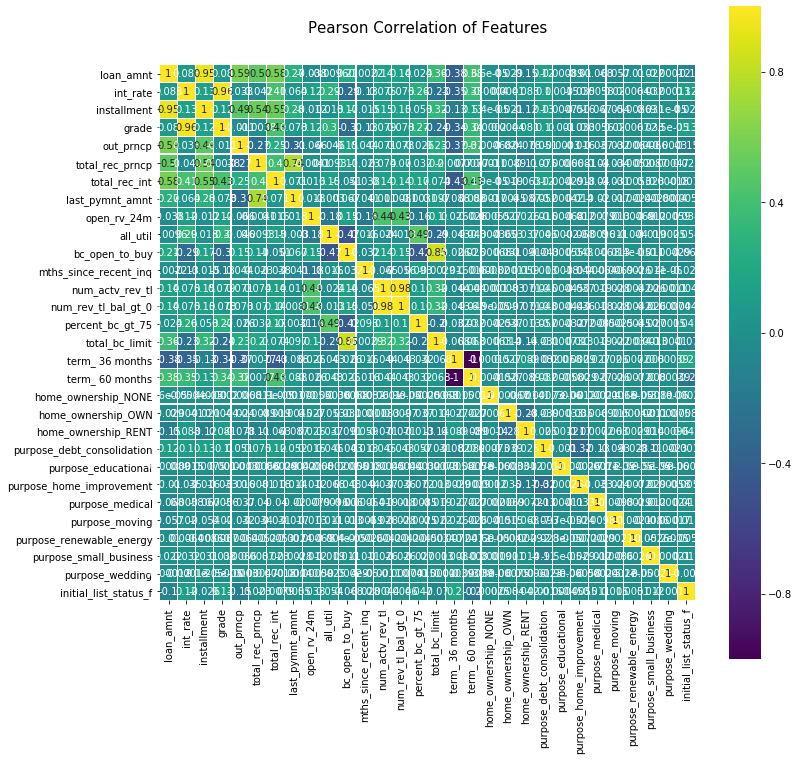

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df3[features].corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [12]:
dropcols=['installment','grade','num_rev_tl_bal_gt_0','bc_open_to_buy','term_ 36 months']
newfeatures=features.drop(dropcols)

In [28]:
cols = df3[newfeatures].columns
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100, random_state=123)
clf.fit(X[newfeatures],y) 
cols, clf.feature_importances_
for feature in zip(cols, clf.feature_importances_):
    print(feature)

('loan_amnt', 0.08062173422026646)
('int_rate', 0.04342909425751635)
('out_prncp', 0.32800573609849926)
('total_rec_prncp', 0.190501942542613)
('total_rec_int', 0.05619173739555209)
('last_pymnt_amnt', 0.16971461528267712)
('open_rv_24m', 0.0133092080755847)
('all_util', 0.023327623016865594)
('mths_since_recent_inq', 0.01555285593813521)
('num_actv_rev_tl', 0.015395554510703985)
('percent_bc_gt_75', 0.012947321302008164)
('total_bc_limit', 0.02734022044346123)
('term_ 60 months', 0.007155380411840648)
('home_ownership_NONE', 1.0424253362926488e-10)
('home_ownership_OWN', 0.0022025318641808915)
('home_ownership_RENT', 0.003563202114648443)
('purpose_debt_consolidation', 0.003928608313233859)
('purpose_educational', 1.4671865290464146e-09)
('purpose_home_improvement', 0.0016915825145941206)
('purpose_medical', 0.0007279722663657831)
('purpose_moving', 0.0005124449125133046)
('purpose_renewable_energy', 8.135915514822461e-05)
('purpose_small_business', 0.0007779272234870253)
('purpose_we

In [29]:
cols = df3[newfeatures].columns
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X[newfeatures],y) 
cols, clf.feature_importances_
for feature in zip(cols, clf.feature_importances_):
    print(feature)

('loan_amnt', 0.08245493292607543)
('int_rate', 0.04380088519570329)
('out_prncp', 0.30826837097276)
('total_rec_prncp', 0.20310375973382735)
('total_rec_int', 0.060779619249482914)
('last_pymnt_amnt', 0.16899717258610833)
('open_rv_24m', 0.013351819483143512)
('all_util', 0.023293047063843036)
('mths_since_recent_inq', 0.01564651266281928)
('num_actv_rev_tl', 0.01523813171426642)
('percent_bc_gt_75', 0.012966753056025756)
('total_bc_limit', 0.0274083447531297)
('term_ 60 months', 0.0076223635855243105)
('home_ownership_NONE', 2.6522606831236165e-10)
('home_ownership_OWN', 0.002274681805166684)
('home_ownership_RENT', 0.003557415486084212)
('purpose_debt_consolidation', 0.004282563341139682)
('purpose_educational', 0.0)
('purpose_home_improvement', 0.0017023179409134577)
('purpose_medical', 0.0007361831106278751)
('purpose_moving', 0.000518805643123211)
('purpose_renewable_energy', 8.762529427179857e-05)
('purpose_small_business', 0.0007850313251661223)
('purpose_wedding', 1.3886975093

In [13]:
features=newfeatures.drop(['home_ownership_NONE','purpose_educational','purpose_renewable_energy','purpose_wedding'])

In [14]:
X_features=list(features)
X=df3[X_features]
y=df3['loan_condition']

In [15]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy='majority') 
X, y = rus.fit_sample(X, y)

In [17]:
n_sample = y.shape[0]
n_pos_sample = y[y == 0].shape[0]
n_neg_sample = y[y == 1].shape[0]
print('n_sample：{}; pos_sample{:.2%}; neg_sample{:.2%}'.format(n_sample,
                                                   n_pos_sample / n_sample,
                                                   n_neg_sample / n_sample))

n_sample：257794; pos_sample50.00%; neg_sample50.00%


In [18]:
from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression() 
clf1.fit(X, y)

/Users/chengfangbei/Desktop/Anaconda3/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
predicted1 = clf1.predict(X) # 通过分类器产生预测结果
from sklearn.metrics import accuracy_score
print("Test set accuracy score: {:.5f}".format(accuracy_score(predicted1, y,)))

Test set accuracy score: 0.89246


In [22]:
from sklearn.metrics import confusion_matrix
m = confusion_matrix(y, predicted1) 
m

array([[127047,   1850],
       [ 25872, 103025]])

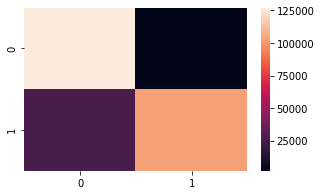

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5,3))
sns.heatmap(m) 

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y, predicted1))

              precision    recall  f1-score   support

           0       0.83      0.99      0.90    128897
           1       0.98      0.80      0.88    128897

    accuracy                           0.89    257794
   macro avg       0.91      0.89      0.89    257794
weighted avg       0.91      0.89      0.89    257794



In [26]:
from sklearn.metrics import roc_auc_score
roc_auc1 = roc_auc_score(y, predicted1)
print("Area under the ROC curve : %f" % roc_auc1)

Area under the ROC curve : 0.892465


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state =999)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
clf_gini = DecisionTreeClassifier(criterion = 'gini',random_state =0, class_weight = 'balanced')
clf_gini = clf_gini.fit(X_train, y_train)
print('Decision Tree result for gini index')
print(classification_report(y_test, clf_gini.predict(X_test)))

Decision Tree result for gini index
              precision    recall  f1-score   support

           0       0.86      0.85      0.86     32235
           1       0.85      0.86      0.86     32214

    accuracy                           0.86     64449
   macro avg       0.86      0.86      0.86     64449
weighted avg       0.86      0.86      0.86     64449



In [22]:
clf_entropy = DecisionTreeClassifier(criterion = 'entropy',random_state =999, class_weight = 'balanced')
clf_entropy = clf_entropy.fit(X_train, y_train)
print('Decision Tree result for information gain')
print(classification_report(y_test, clf_entropy.predict(X_test)))

Decision Tree result for information gain
              precision    recall  f1-score   support

           0       0.86      0.86      0.86     32235
           1       0.86      0.86      0.86     32214

    accuracy                           0.86     64449
   macro avg       0.86      0.86      0.86     64449
weighted avg       0.86      0.86      0.86     64449



In [23]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(X_train, y_train) 

/Users/chengfangbei/Desktop/Anaconda3/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
y_pred = clf.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.89


In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[31777   458]
 [ 6474 25740]]


In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.99      0.90     32235
           1       0.98      0.80      0.88     32214

    accuracy                           0.89     64449
   macro avg       0.91      0.89      0.89     64449
weighted avg       0.91      0.89      0.89     64449

